In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Online shoppers purchasing 

### QUESTIONS
- Does customers visit more in the weekdays or weekend?
- What are the different types of visitors? And find the highest number of visitors. 
- And which months has the highest numbers of visitors? and why? 

In [27]:
df= pd.read_csv("/Users/Chhimi/Desktop/Data/assignmet_file/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Column descriptions

- Administrative: This is the number of pages of this type (administrative) that the user visited.

- Administrative_Duration: This is the amount of time spent in this category of pages.

- Informational: This is the number of pages of this type (informational) that the user visited.
    
- Informational_Duration: This is the amount of time spent in this category of pages.

- ProductRelated: This is the number of pages of this type (product related) that the user visited.

- ProductRelated_Duration: This is the amount of time spent in this category of pages.

- BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

- ExitRates: The percentage of pageviews on the website that end at that specific page.

- PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.More information about how this is calculated

- SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

- Month: Contains the month the pageview occurred, in string form.

- OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

- Browser: An integer value representing the browser that the user was using to view the page.

- Region: An integer value representing which region the user is located in.

- TrafficType: An integer value representing what type of traffic the user is categorized into.Read more about traffic types here.

- VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

- Weekend: A boolean representing whether the session is on a weekend.

- Revenue: A boolean representing whether or not the user completed the purchase.

## exploratory Data Analysis 

In [28]:
# describing the data

df.describe(include='all') 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [29]:
nullcount= df.isnull().sum()   # checking the count of null values
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


In [30]:
# taking out the information from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [31]:
# checking if the data contains any null vlaues

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
# checking the distrubution of revenue

df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [8]:
df.mean().head()

Administrative              2.315166
Administrative_Duration    80.818611
Informational               0.503569
Informational_Duration     34.472398
ProductRelated             31.731468
dtype: float64

In [9]:
####GROUPBY

In [10]:
df.agg(['max', 'min']).melt().head()    

,variable,value
0,Administrative,27
1,Administrative,0
2,Administrative_Duration,3398.75
3,Administrative_Duration,0
4,Informational,24


In [11]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [12]:
df['Month'].value_counts()   # checking the month wiht most no: of customers visiting the online shopping sites

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [13]:
## Apply

In [74]:
df.rename(columns={'SpecialDay': 'SPECIALDAY','Revenue':'REVENUE' },inplace=True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SPECIALDAY,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,REVENUE
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## cleaning data

In [15]:
df.shape

(12330, 18)

In [16]:
df.isnull().sum().head()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
dtype: int64

In [17]:
df['BounceRates'].unique()    ## cleaning data

array([0.2       , 0.        , 0.05      , ..., 0.00382775, 0.00086956,
       0.01114899])

In [18]:
df['BounceRates'].replace( '...', 0, inplace= True )

In [70]:
df['BounceRates'].sum()

273.61972120400003

In [71]:
df['BounceRates'].mean()

0.02219138047072152

In [20]:
df['ExitRates'].unique()

array([0.2       , 0.1       , 0.14      , ..., 0.01276133, 0.01395349,
       0.02903061])

In [73]:
df['ExitRates'].replace('...',0, inplace= True)

In [22]:
df['ExitRates'].mean()

0.04307279776650371

In [72]:
df['ExitRates'].median()

0.0251564025

##  visualization

In [24]:
df[::]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SPECIALDAY,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,REVENUE
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


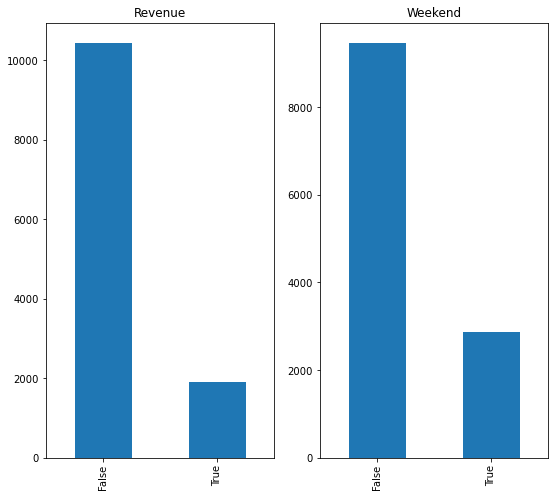

In [69]:


fig, axes = plt.subplots(1,2, figsize=(9, 8))
ax1 = df['Revenue'].value_counts().plot(kind = 'bar', ax = axes[0], title = 'Revenue')
ax2 = df['Weekend'].value_counts().plot(kind = 'bar', ax = axes[1], title = 'Weekend')

ax1
ax2

In [ ]:
# hue = grouping varaible that will produce points with different colors. Can be either categorial or numberic, although color mapping will behave differently in latter case
# palette= method for choosing hte colors to use when mapping the hue semantic. 

In [35]:

Stats = df[['Administrative_Duration','Informational_Duration', 'ProductRelated_Duration',
           'BounceRates', 'ExitRates', 'PageValues']]
Stats.describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,80.818611,34.472398,1194.746220,0.022191,0.043073,5.889258
std,176.779107,140.749294,1913.669288,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,184.137500,0.000000,0.014286,0.000000
50%,7.500000,0.000000,598.936905,0.003112,0.025156,0.000000
75%,93.256250,0.000000,1464.157213,0.016813,0.050000,0.000000
max,3398.750000,2549.375000,63973.522230,0.200000,0.200000,361.763742


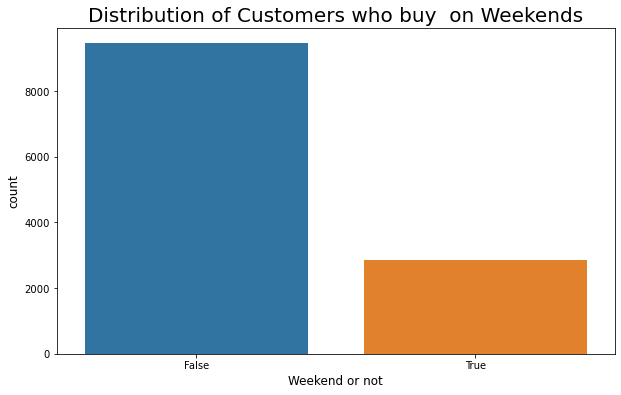

In [36]:
# checking the distribution of customer on weekend 

fig, axes = plt.subplots( figsize=(10,6))
sns.countplot(df['Weekend'])
plt.title('Distribution of Customers who buy  on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.show()

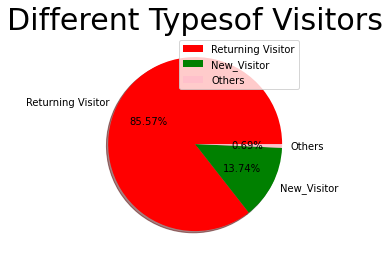

In [37]:
# PIE CHART FOR DIFFERENT TYPES OF CUSTOMERS

size= [10551,1694,85]

colors = ['red', 'green', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"


plt.pie(size, colors=colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Different Typesof Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
# PIE CHART FOR SPECIAL DAYS

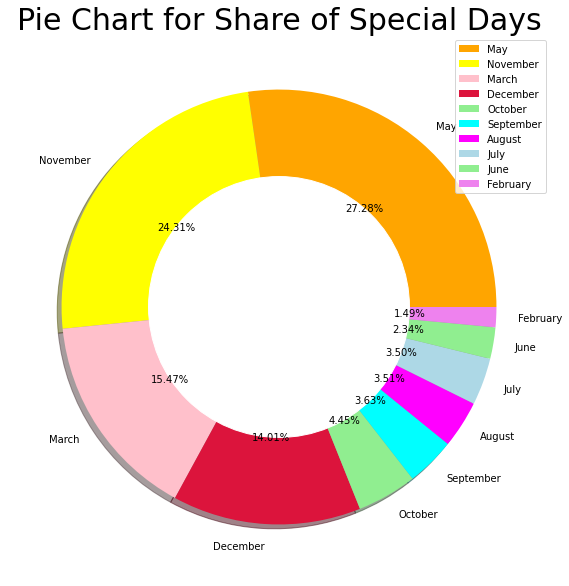

In [57]:
#size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]


fig, axes = plt.subplots( figsize=(12,10))
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white') #for inner circle

plt.pie(size, colors = colors, labels = labels,explode = explode, shadow = True, autopct = '%1.2f%%')
plt.title('Pie Chart for Share of Special Days', fontsize = 30)

p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()


#GCF= get current figure
# GCA= get current axes
# autopct= to add percentage in the pie chart
#artist= Abstract base class for objects that render into a FigureCanvas.Typically, all visible elements in a figure are subclasses of Artist

In [58]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:

plt.hist(df.X,density=True,alpha=0.6,histtype="step")
plt.hist(df.Y,density=True,alpha=0.5)
plt.show()

In [ ]:
# px





## conclusion

- More customers purchase online during weekdays.

- The different types of visitors are:  
	 - Returning Visitors, 85,57 %
	 - New visitor, 13,74 %
	 - others, 0,69 %

- The month May has the highest numbers of visitors. 
	It is more likely because it is summer and people tend 
	be in the better mood. 
